In [2]:
#set up and installation
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install lxml


print('Libraries imported.')

Solving environment: - ^C
failed

CondaError: KeyboardInterrupt

Libraries imported.


In [3]:
#loading of postal code data given in intial step
import requests
from lxml import html

table = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

df = table[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
#cleaning of data to drop Not assigned neighbourhoods. display of filtered data and frame
df['Borough'].replace("Not assigned",np.nan, inplace = True)
df['Neighbourhood'].replace('Not assigned' ,np.nan,inplace = True)

df_filtered=df.dropna()
print(df_filtered.head())
df_filtered.shape

  Postal Code           Borough                                Neighbourhood
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government


(103, 3)

In [5]:
#loading of Geographical data
url_source = pd.read_csv("https://cocl.us/Geospatial_data")
url_source.head()

result = pd.merge(df, url_source, on='Postal Code')
result.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


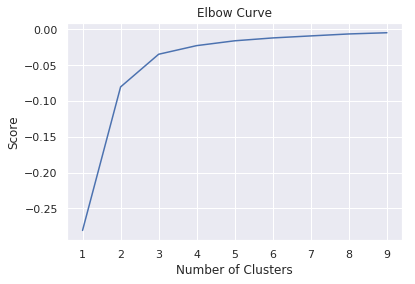

In [7]:
#breaking down data set into clusters, first identifying appropriate number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = result[['Latitude']]
X_axis = result[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [9]:
#assigning clusters to given postal codes
kmeans = KMeans(n_clusters = 3, init ='k-means++')
result['cluster_label'] = kmeans.fit_predict(result[result.columns[4:7]])
centers = kmeans.cluster_centers_ 
# Coordinates of cluster centers.
labels = kmeans.predict(result[result.columns[4:6]]) # Labels of each point
result.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,cluster_label
0,M3A,North York,Parkwoods,43.753259,-79.329656,1
1,M4A,North York,Victoria Village,43.725882,-79.315572,0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,2
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1


In [ ]:
#to generate clusters on map after doing K nearest Neighbour
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium


toronto_map = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
neighbourhood_map = folium.map.FeatureGroup()
color_choice = ['red', 'blue', 'green']
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, clust in zip(result['Latitude'], result['Longitude'],result['cluster_label']):
    neighbourhood_map.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color=color_choice[clust],
            fill=True,
            fill_color=color_choice[clust],
            fill_opacity=0.6
        )
    )

# add incidents to map
toronto_map.add_child(neighbourhood_map)

Solving environment: \ 